In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd

In [4]:
data_dir="C:\\Users\\99ash\\Downloads\\cancer"

In [5]:
os.listdir(data_dir)

['HAM10000_metadata.csv', 'Skin Cancer', 'test', 'train']

In [6]:
train_path=os.path.join(data_dir,'train')

In [7]:
train_path

'C:\\Users\\99ash\\Downloads\\cancer\\train'

In [8]:
os.listdir(train_path)

['Cancer', 'Not-Cancer']

In [9]:
test_path=os.path.join(data_dir,'test')

In [10]:
os.listdir(test_path)

['Cancer', 'Not-Cancer']

In [11]:
os.listdir(train_path +'//Cancer')[0]

'ISIC_0024313.jpg'

In [12]:
single_cell=train_path +'//Cancer\\'+'ISIC_0024313.jpg'

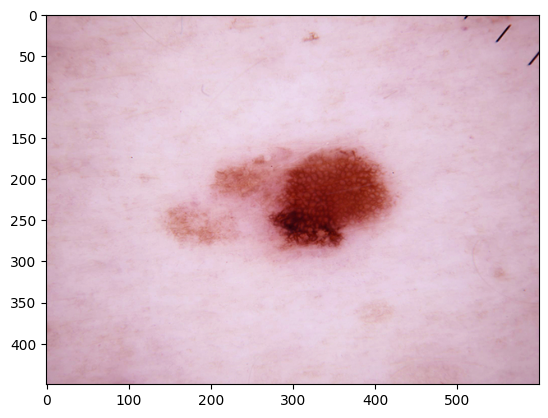

In [13]:
plt.imshow(imread(single_cell))

In [14]:
os.listdir(train_path +'//Not-Cancer')[0]

'ISIC_0024306.jpg'

In [15]:
single_image1=train_path +'//Not-Cancer\\'+'ISIC_0024306.jpg'

In [16]:
imread(single_image1).shape

(450, 600, 3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [124]:
# setup flow from directory
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 3629 images belonging to 2 classes.
Found 920 images belonging to 2 classes.


In [126]:
#creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [128]:
model=Sequential()

In [130]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(450,600,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(450,600,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(450,600,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(450,600,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [132]:
model.add(Dropout(0.5))
# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 448, 598, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 224, 299, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 297, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 148, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 146, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 73, 64)      

In [136]:
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
batch_size=32

In [140]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [142]:
train_image_gen=image_gen.flow_from_directory(train_path,color_mode='rgb',target_size=(450,600),batch_size=32,class_mode='binary')

Found 3629 images belonging to 2 classes.


In [144]:
test_image_gen=image_gen.flow_from_directory(test_path,color_mode='rgb',target_size=(450,600),batch_size=32,class_mode='binary',shuffle=False)

Found 920 images belonging to 2 classes.


In [146]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#fit model
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
114/114 [==============================] - 998s 9s/step - loss: 15.0245 - accuracy: 0.6035 - val_loss: 0.6854 - val_accuracy: 0.5815
Epoch 2/10
114/114 [==============================] - 993s 9s/step - loss: 0.6901 - accuracy: 0.5919 - val_loss: 0.6724 - val_accuracy: 0.5880
Epoch 3/10
114/114 [==============================] - 1190s 10s/step - loss: 0.6824 - accuracy: 0.5941 - val_loss: 0.6760 - val_accuracy: 0.5848
Epoch 4/10
114/114 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.5913

In [60]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

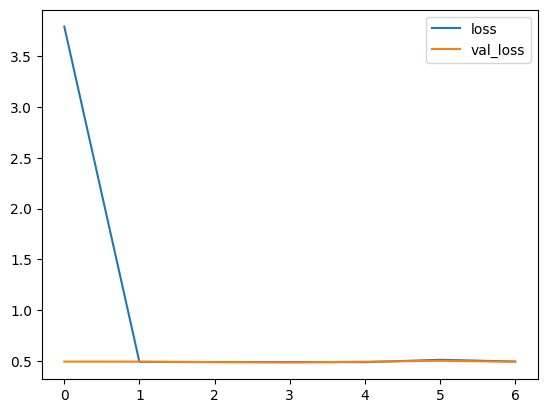

In [62]:
loss[['loss','val_loss']].plot()

In [64]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate_generator(test_image_gen)

[0.4937044382095337, 0.8048902153968811]

In [68]:
pred_probabilities = model.predict_generator(test_image_gen)

In [70]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [72]:
predictions = pred_probabilities > 0.5

In [74]:
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       391
           1       0.80      1.00      0.89      1613

    accuracy                           0.80      2004
   macro avg       0.40      0.50      0.45      2004
weighted avg       0.65      0.80      0.72      2004



In [78]:
single_cell

'C:\\Users\\99ash\\Downloads\\cancer\\train//Cancer\\ISIC_0024313.jpg'

In [82]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(single_cell,target_size=(450,600,3))

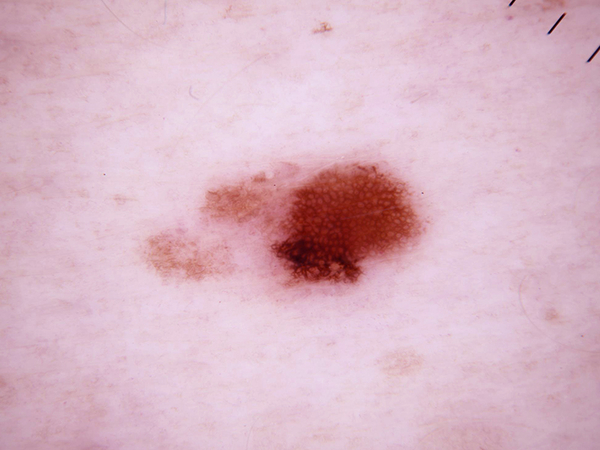

In [84]:
my_image

In [86]:
my_image = image.img_to_array(my_image)

In [90]:
import numpy as np

In [92]:
my_image = np.expand_dims(my_image, axis=0)

In [94]:
my_image.shape

(1, 450, 600, 3)

In [96]:
model.predict(my_image)

1/1 [==============================] - 0s 163ms/step


array([[0.8087872]], dtype=float32)

In [98]:
train_image_gen.class_indices

{'Cancer': 0, 'Not-Cancer': 1}

In [100]:
test_image_gen.class_indices

{'Cancer': 0, 'Not-Cancer': 1}